# Titanic Survival Prediction

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn import metrics
# ML Algorithms
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier


## Adding Dataframes

In [42]:
from sklearn.model_selection import train_test_split
df=pd.read_csv("./train.csv") #load train data
df_train,df_test = train_test_split(df, train_size=0.7,test_size=0.3, random_state=42)


In [43]:

df_train.shape
df_test.shape
train = df_train.copy() # make train data copies
test = df_test.copy() # make test data copies
trainCopy = df_train.copy() # make train data copies
testCopy = df_test.copy() # make test data copies

## Data Exploration/Analysis

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 445 to 102
Data columns (total 12 columns):
PassengerId    623 non-null int64
Survived       623 non-null int64
Pclass         623 non-null int64
Name           623 non-null object
Sex            623 non-null object
Age            499 non-null float64
SibSp          623 non-null int64
Parch          623 non-null int64
Ticket         623 non-null object
Fare           623 non-null float64
Cabin          139 non-null object
Embarked       622 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 63.3+ KB


In [45]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,623.000000,623.000000,623.000000,499.000000,623.000000,623.000000,623.000000
mean,446.581059,0.370787,2.341894,29.256353,0.576244,0.386838,31.840730
std,260.012799,0.483404,0.819945,14.558567,1.216267,0.807692,51.027372
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,216.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.925000
50%,454.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,675.500000,1.000000,3.000000,38.000000,1.000000,0.000000,30.750000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Identify Missing Data

In [46]:
total = train.isnull().sum().sort_values(ascending=False)
percent1 = train.isnull().sum()/train.isnull().count()*100
percent2 = (round(percent1, 1)).sort_values(ascending=False)
missingData = pd.concat([total, percent2], axis=1, keys=['Total', '%'])
missingData.head()

,Total,%
Cabin,484,77.7
Age,124,19.9
Embarked,1,0.2
Fare,0,0.0
Ticket,0,0.0


## Identifying Visual Patterns

### Age,Sex vs Survival

/home/wishwa/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/wishwa/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/wishwa/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/wishwa/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


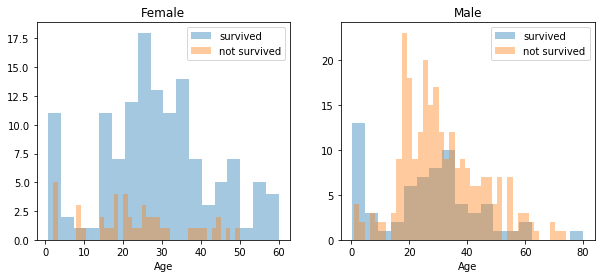

In [47]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train[train['Sex']=='female']
men = train[train['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

### Embarked, Pclass and Sex:

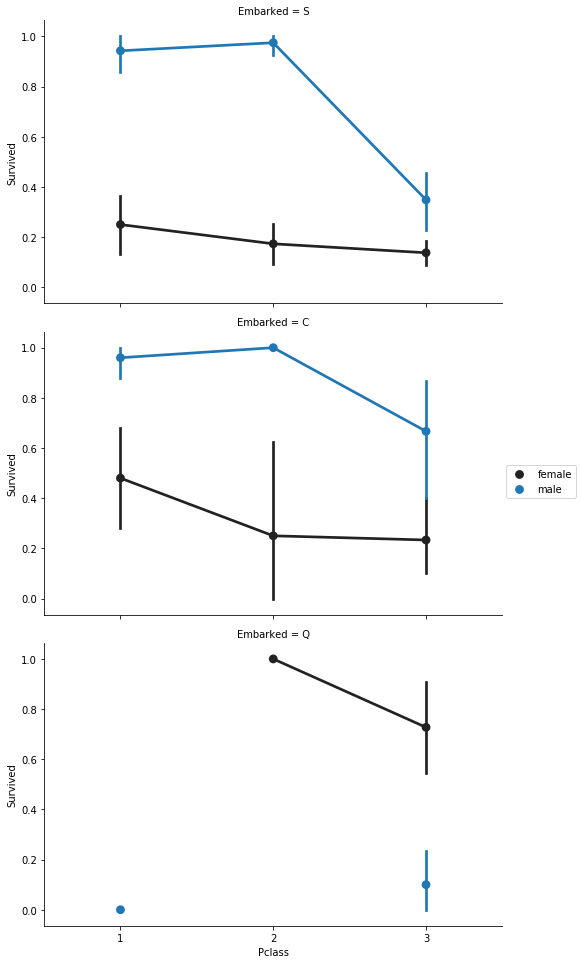

In [48]:
FacetGrid = sns.FacetGrid(train, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

### Pclass

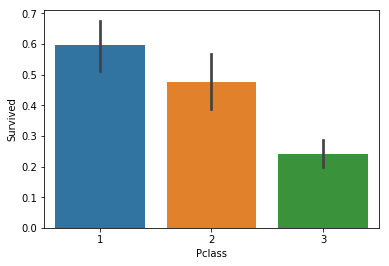

In [49]:
sns.barplot(x='Pclass', y='Survived', data=train)

### Sibsp,Parch and add relatives/not_alone columns 

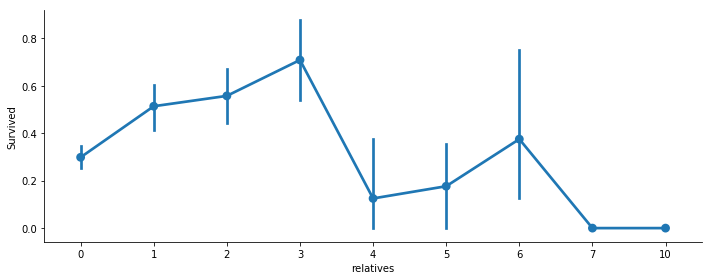

In [50]:
data = [train, test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train['not_alone'].value_counts()
axes = sns.factorplot('relatives','Survived', 
                      data=train, aspect = 2.5, )

## Data Preprocessing

### Remove Name/PassengerId Column 


In [51]:
del train['Name']
#del train['PassengerId']
del test['Name']
#del test['PassengerId']
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
445,446,1,1,male,4.0,0,2,33638,81.8583,A34,S,2,0
650,651,0,3,male,NaN,0,0,349221,7.8958,NaN,S,0,1
172,173,1,3,female,1.0,1,1,347742,11.1333,NaN,S,2,0
450,451,0,2,male,36.0,1,2,C.A. 34651,27.7500,NaN,S,3,0
314,315,0,2,male,43.0,1,1,F.C.C. 13529,26.2500,NaN,S,2,0


### Interprit Cabin to Deck and Replace the feature

In [52]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train, test]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int) 

### Drop Cabin from both Datasets

In [53]:
del train['Cabin']
del test['Cabin']
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
445,446,1,1,male,4.0,0,2,33638,81.8583,S,2,0,1
650,651,0,3,male,NaN,0,0,349221,7.8958,S,0,1,8
172,173,1,3,female,1.0,1,1,347742,11.1333,S,2,0,8
450,451,0,2,male,36.0,1,2,C.A. 34651,27.7500,S,3,0,8
314,315,0,2,male,43.0,1,1,F.C.C. 13529,26.2500,S,2,0,8


## Missing Data

### Age (Replace NaN using Std & mean values)

In [54]:
data = [train, test]

for dataset in data:
    mean = train["Age"].mean()
    std = test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train["Age"].astype(int)

### Embarked (Fill with most common value)

In [55]:
common_value = 'S'
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

### Fare (Convert to int64)

In [56]:
data = [train, test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

### Sex/Embarked (Convert to numeric)

In [57]:
gender_map={'male':1,'female':0}
train['Sex']=train['Sex'].map(gender_map)
test['Sex']=test['Sex'].map(gender_map)
embarked_map={'S':1,'C':2,'Q':3}
train['Embarked']=train['Embarked'].map(embarked_map)
test['Embarked']=test['Embarked'].map(embarked_map)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
445,446,1,1,1,4,0,2,33638,81,1,2,0,1
650,651,0,3,1,28,0,0,349221,7,1,0,1,8
172,173,1,3,0,1,1,1,347742,11,1,2,0,8
450,451,0,2,1,36,1,2,C.A. 34651,27,1,3,0,8
314,315,0,2,1,43,1,1,F.C.C. 13529,26,1,2,0,8


### Ticket (Drop)

In [58]:
del train['Ticket']
del test['Ticket']

## Creating Categories

### Age

In [67]:
data = [train, test]
for dataset in data:
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [68]:
train.head(50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck
445,446,1,1,1,0,0,2,81,1,2,0,1
650,651,0,3,1,0,0,0,7,1,0,1,8
172,173,1,3,0,0,1,1,11,1,2,0,8
450,451,0,2,1,0,1,2,27,1,3,0,8
314,315,0,2,1,0,1,1,26,1,2,0,8
332,333,0,1,1,0,0,1,153,1,1,0,3
801,802,1,2,0,0,1,1,26,1,2,0,8
90,91,0,3,1,0,0,0,8,1,0,1,8
834,835,0,3,1,0,0,0,8,1,0,1,8
181,182,0,2,1,0,0,0,15,2,0,1,8


In [21]:
feature_col_names=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','relatives','not_alone','Deck']
predicted_class_name=['Survived']
X_train= train[feature_col_names].values #predictor feature columns (10 x m)
y_train=train[predicted_class_name].values #predicted class (1 = true, 0 = false) column (1 x m)
X_test=test[feature_col_names].values #predictor feature columns (10 x m)
y_test=test[predicted_class_name].values #predicted class (1 = true, 0 = false) column (1 x m)

#test['Survived'] = np.nan
#test['Survived']=test['Survived'].fillna(0) 
#test['Survived']=test['Survived'].astype(int)


test.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck
709,710,1,3,1,0,1,1,15,2,2,0,8
439,440,0,2,1,0,0,0,10,1,0,1,8
840,841,0,3,1,0,0,0,7,1,0,1,8
720,721,1,2,0,0,0,1,33,1,1,0,8
39,40,1,3,0,0,1,0,11,2,1,0,8
290,291,1,1,0,0,0,0,78,1,0,1,8
300,301,1,3,0,0,0,0,7,3,0,1,8
333,334,0,3,1,0,2,0,18,1,2,0,8
208,209,1,3,0,0,0,0,7,3,0,1,8
136,137,1,1,0,0,0,2,26,1,2,0,4


## Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
rf_model = RandomForestClassifier()      # Create random forest object
rf_model.fit(X_train, y_train.ravel())

rf_predict_train = rf_model.predict(X_train)
# training metrics
#print("Training data Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

rf_predict_train = rf_model.predict(X_train)
rf_predict_test = rf_model.predict(X_test)

print('Model Performance')
#print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
#print('Accuracy = {:0.2f}%.'.format(accuracy))

# training metrics
print("Train data Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))
print("Test data Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))





Model Performance
Train data Accuracy: 0.9374
Test data Accuracy: 0.7500


## Random Forest came up with the accuracy of 82.54% for the TESTING DATA only with data preprocessing and Cross Validation

## Implementing Optimization

### Examine default RF to determine parameters

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
rf_model = RandomForestClassifier(n_estimators= 1000,random_state=0)      # Create random forest object

rf_model.fit(X_train, y_train.ravel())
rf_predict_train = rf_model.predict(X_train)
rf_predict_test = rf_model.predict(X_test)

# training metrics
baccuracy=metrics.accuracy_score(y_test, rf_predict_test)
print("Train data Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))
print("Test data Accuracy: {0:.4f}".format(baccuracy))

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 20, num = 10)]
# Minimum number of samples required to split a node
min_samples_split = [2,3,4,5,6,7,8,9,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3,4,5]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

Train data Accuracy: 0.9486
Test data Accuracy: 0.7537
{'bootstrap': [True, False],
 'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 20],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 3, 4, 5],
 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [25]:
rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=random_grid,
                               scoring='neg_mean_absolute_error', 
                              cv = 5, verbose=2,  n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train.ravel());

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=15, bootstrap=False 
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=15, bootstrap=False 
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=15, bootstrap=False 
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=15, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=15, bootstrap=False, total=   2.1s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=15, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=15, bootstrap=False, total=   2.2s
[CV] n_estimators=1600, min_samples_split=8, min_samples_leaf=1, max_features=auto, max_depth=3, bootstr

[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=1, bootstrap=True, total=   3.3s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=9, bootstrap=False 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.7s


[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=1, bootstrap=True, total=   3.4s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=9, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=1, bootstrap=True, total=   3.6s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=9, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=9, bootstrap=False, total=   3.6s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=9, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=9, bootstrap=False, total=   3.7s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=1, bootstrap=False 
[CV]  n_estimators=1800, min

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   36.1s finished


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
rf_model = RandomForestClassifier(n_estimators= 1000,random_state=0)      # Create random forest object

rf_model.fit(X_train, y_train.ravel())
rf_predict_train = rf_model.predict(X_train)
rf_predict_test = rf_model.predict(X_test)

# training metrics
baccuracy=metrics.accuracy_score(y_test, rf_predict_test)
print("Train data Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))
print("Test data Accuracy: {0:.4f}".format(baccuracy))

from sklearn.model_selection import GridSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 598, stop = 602, num = 6)]
# Number of features to consider at every split
max_features = [ 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 7, num = 4)]
# Minimum number of samples required to split a node
min_samples_split = [4,5,6]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3]
# Method of selecting samples for training each tree
bootstrap = [False]
# Create the random grid
p_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


rf_grid = GridSearchCV(estimator=rf_model,param_grid=p_grid,
                               scoring='neg_mean_absolute_error', 
                              cv = 5, verbose=2,  n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_grid.fit(X_train, y_train.ravel());
rf_grid.best_params_

Train data Accuracy: 0.9486
Test data Accuracy: 0.7537
{'bootstrap': [True, False],
 'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 20],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 3, 4, 5],
 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=598 
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=598 
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=598 
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=598 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=598, total=   1.2s
[CV] bootstrap=False,

[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=598 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=598, total=   1.7s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=598 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=598, total=   1.3s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=598 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.5s


[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=598, total=   1.3s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=598 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=598, total=   1.4s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=598 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=598, total=   1.5s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=598 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=598, total=   1.8s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=599 
[CV]  bootstrap=False, max_depth=3, 

[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=598, total=   1.3s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=599 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=598, total=   1.4s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=599 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=599, total=   1.3s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=599 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=598, total=   1.4s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=599 
[CV]  bootstrap=False, max_depth=3, 

[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=599, total=   1.1s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=599, total=   1.1s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=599, total=   1.1s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=599, total=   1.1s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600 
[CV]  bootstrap=False, max_depth=3, 

[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600, total=   1.0s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600, total=   1.1s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=601 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600, total=   1.1s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=601 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600, total=   1.0s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=601 
[CV]  bootstrap=False, max_depth=3, 

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   51.0s


[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=598, total=   1.1s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=598 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=598, total=   1.0s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=599 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=598, total=   1.1s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=599 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=598, total=   1.1s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=599 
[CV]  bootstrap=False, max_depth=3, 

[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=599, total=   1.0s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=599 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=598, total=   1.2s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=599 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=599, total=   1.1s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=600 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=599, total=   1.1s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=600 
[CV]  bootstrap=False, max_depth=3, 

[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=599, total=   1.0s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=599, total=   1.0s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=600, total=   1.1s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=600, total=   1.1s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=601 
[CV]  bootstrap=False, max_depth=3, 

[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=600, total=   1.1s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=601 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=600, total=   1.1s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=601 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=600, total=   1.1s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=601 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=601, total=   1.1s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=601 
[CV]  bootstrap=False, max_depth=3, 

[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=601, total=   1.1s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=602 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=601, total=   1.1s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=602 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=601, total=   1.2s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=602 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=601, total=   1.1s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=602 
[CV]  bootstrap=False, max_depth=4, 

[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=602, total=   1.1s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=602 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=602, total=   1.1s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=598 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=602, total=   1.1s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=598 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=602, total=   1.1s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=598 
[CV]  bootstrap=False, max_depth=4, 

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.9min


[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=602, total=   1.2s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=598 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=602, total=   1.1s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=598 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=602, total=   1.1s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=598 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=598, total=   1.2s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=598 
[CV]  bootstrap=False, max_depth=4, 

[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=598, total=   1.1s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=598 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=598, total=   1.1s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=598 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=598, total=   1.2s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=598 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=598, total=   1.1s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=598 
[CV]  bootstrap=False, max_depth=4, 

[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=598, total=   1.1s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=598 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=598, total=   1.2s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=599 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=598, total=   1.2s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=599 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=598, total=   1.1s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=599 
[CV]  bootstrap=False, max_depth=4, 

[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=598, total=   1.1s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=599 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=599, total=   1.1s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=599 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=599, total=   1.1s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=600 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=599, total=   1.1s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=600 
[CV]  bootstrap=False, max_depth=4, 

[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=599, total=   1.2s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=599, total=   1.2s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=600, total=   1.1s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=600, total=   1.1s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=601 
[CV]  bootstrap=False, max_depth=4, 

[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=600, total=   1.1s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=601 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=600, total=   1.1s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=601 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=600, total=   1.1s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=601 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=601, total=   1.1s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=601 
[CV]  bootstrap=False, max_depth=4, 

[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=601, total=   1.1s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=602 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=601, total=   1.1s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=602 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=601, total=   1.2s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=602 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=602, total=   1.2s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=602 
[CV]  bootstrap=False, max_depth=5, 

[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=602, total=   1.1s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=602 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=602, total=   1.2s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=598 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=602, total=   1.1s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=598 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=602, total=   1.1s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=598 
[CV]  bootstrap=False, max_depth=5, 

[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=602, total=   1.1s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=598 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=598, total=   1.1s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=598 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=598, total=   1.0s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=598 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=598, total=   1.0s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=598 
[CV]  bootstrap=False, max_depth=5, 

[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.3min


[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=599, total=   1.2s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=599, total=   1.2s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=599, total=   1.1s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=599, total=   1.1s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600 
[CV]  bootstrap=False, max_depth=5, 

[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600, total=   1.2s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600, total=   1.2s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=601 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600, total=   1.2s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=601 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600, total=   1.1s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=601 
[CV]  bootstrap=False, max_depth=5, 

[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=600, total=   1.2s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=601 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=601, total=   1.1s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=601 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=601, total=   1.2s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=602 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=601, total=   1.2s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=602 
[CV]  bootstrap=False, max_depth=5, 

[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=601, total=   1.2s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=602 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=601, total=   1.2s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=602 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=602, total=   1.2s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=602 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=602, total=   1.2s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=598 
[CV]  bootstrap=False, max_depth=5, 

[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=602, total=   1.2s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=598 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=602, total=   1.2s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=598 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=602, total=   1.2s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=598 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=598, total=   1.2s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=598 
[CV]  bootstrap=False, max_depth=5, 

[CV]  bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=598, total=   1.2s
[CV] bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=598 
[CV]  bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=598, total=   1.3s
[CV] bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=598 
[CV]  bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=598, total=   1.2s
[CV] bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=598 
[CV]  bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=598, total=   1.2s
[CV] bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=598 
[CV]  bootstrap=False, max_depth=7, 

[CV]  bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=598, total=   1.3s
[CV] bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=598 
[CV]  bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=598, total=   1.3s
[CV] bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=599 
[CV]  bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=598, total=   1.5s
[CV] bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=599 
[CV]  bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=598, total=   1.1s
[CV] bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=599 
[CV]  bootstrap=False, max_depth=7, 

[CV]  bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=598, total=   1.4s
[CV] bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=599 
[CV]  bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=599, total=   1.4s
[CV] bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=599 
[CV]  bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=599, total=   1.3s
[CV] bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=600 
[CV]  bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=599, total=   1.3s
[CV] bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=600 
[CV]  bootstrap=False, max_depth=7, 

[CV]  bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=599, total=   1.3s
[CV] bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600 
[CV]  bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=599, total=   1.3s
[CV] bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600 
[CV]  bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600, total=   1.5s
[CV] bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600 
[CV]  bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600, total=   1.7s
[CV] bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=601 
[CV]  bootstrap=False, max_depth=7, 

[CV]  bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600, total=   1.5s
[CV] bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=601 
[CV]  bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600, total=   1.5s
[CV] bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=601 
[CV]  bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600, total=   2.0s
[CV] bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=601 
[CV]  bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=601, total=   1.7s
[CV] bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=601 
[CV]  bootstrap=False, max_depth=7, 

[CV]  bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=601, total=   1.1s
[CV] bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=602 
[CV]  bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=601, total=   1.1s
[CV] bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=602 
[CV]  bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=601, total=   1.1s
[CV] bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=602 
[CV]  bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=601, total=   1.1s
[CV] bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=602 
[CV]  bootstrap=False, max_depth=7, 

[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  5.4min


[CV]  bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=600, total=   1.2s
[CV] bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=600 
[CV]  bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=600, total=   1.3s
[CV] bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=601 
[CV]  bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=600, total=   1.1s
[CV] bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=601 
[CV]  bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=600, total=   1.2s
[CV] bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=601 
[CV]  bootstrap=False, max_depth=7, 

[CV]  bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=600, total=   1.2s
[CV] bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=601 
[CV]  bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=601, total=   1.3s
[CV] bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=601 
[CV]  bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=601, total=   1.2s
[CV] bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=602 
[CV]  bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=601, total=   1.1s
[CV] bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=602 
[CV]  bootstrap=False, max_depth=7, 

[CV]  bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=601, total=   1.1s
[CV] bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=602 
[CV]  bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=601, total=   1.1s
[CV] bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=602 
[CV]  bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=602, total=   1.1s
[CV] bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=602 
[CV]  bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=602, total=   1.1s
[CV]  bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=602, total=   1.1s
[CV]  bootstrap=False

[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  5.8min finished


{'bootstrap': False,
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 598}

In [53]:
rf_grid.best_params_

{'bootstrap': False,
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 598}

In [45]:
max_depth = [int(x) for x in np.linspace(15, 20, num = 6)]
max_depth

[15, 16, 17, 18, 19, 20]

In [54]:
rf_grid.best_params_

{'bootstrap': False,
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 598}

In [55]:
best_grid = rf_grid.best_estimator_
#random_accuracy = evaluate(best_random, X_test, y_test)

rf_predict_train = best_random.predict(X_train)
rf_predict_test = best_random.predict(X_test)

# training metrics
haccuracy=metrics.accuracy_score(y_test, rf_predict_test)
print("Train data Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))
print("Test data Accuracy: {0:.4f}".format(haccuracy))


Train data Accuracy: 0.8700
Test data Accuracy: 0.7799


## Evaluate Function

### Evaluate the default model

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
rf_model = RandomForestClassifier(n_estimators= 1000,random_state=0)      # Create random forest object
rf_model.fit(X_train, y_train.ravel())

rf_predict_train = rf_model.predict(X_train)
# training metrics
#print("Training data Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

rf_predict_train = rf_model.predict(X_train)
rf_predict_test = rf_model.predict(X_test)

# training metrics
baccuracy=metrics.accuracy_score(y_test, rf_predict_test)
print("Train data Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))
print("Test data Accuracy: {0:.4f}".format(baccuracy))


Train data Accuracy: 0.9486
Test data Accuracy: 0.7537


In [28]:
best_random = rf_random.best_estimator_
#random_accuracy = evaluate(best_random, X_test, y_test)

rf_predict_train = best_random.predict(X_train)
rf_predict_test = best_random.predict(X_test)

# training metrics
haccuracy=metrics.accuracy_score(y_test, rf_predict_test)
print("Train data Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))
print("Test data Accuracy: {0:.4f}".format(haccuracy))


Train data Accuracy: 0.8700
Test data Accuracy: 0.7799


In [29]:
print('Improvement of {:0.2f}%.'.format( 100 * (haccuracy - baccuracy) / baccuracy))

Improvement of 3.47%.


## Graphical Representation on hyperparameter variation

### n_estimators

/home/wishwa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/wishwa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/wishwa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/wishwa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/wishwa/anaconda3/lib/python3.6/site-packages/ipykernel_lau

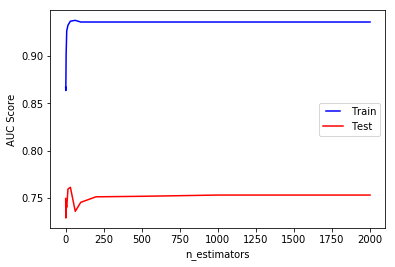

In [34]:
from sklearn.metrics import roc_curve, auc

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200,500,1000,2000]
train_results = []
test_results = []
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train,train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_estimators, train_results, 'b', label='Train')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC Score')
plt.xlabel('n_estimators')
plt.show()

/home/wishwa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/wishwa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/wishwa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/wishwa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/wishwa/anaconda3/lib/python3.6/site-packages/ipykernel_lau

/home/wishwa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/wishwa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/wishwa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/wishwa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/wishwa/anaconda3/lib/python3.6/site-packages/ipykernel_lau

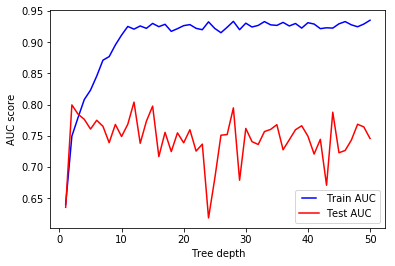

In [35]:
max_depths = np.linspace(1, 50, 50, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_aucA = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_aucA)
    y_pred = rf.predict(X_test)
    false_positive_rateA, true_positive_rateA, thresholds = roc_curve(y_test, y_pred)
    roc_aucB = auc(false_positive_rateA, true_positive_rateA)
    test_results.append(roc_aucB)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

/home/wishwa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/wishwa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/wishwa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/wishwa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/wishwa/anaconda3/lib/python3.6/site-packages/ipykernel_lau

ValueError: x and y must have same first dimension, but have shapes (50,) and (5,)

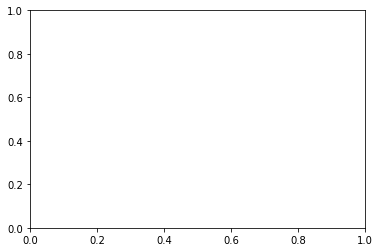

In [49]:
min_samples_leaf = [1,2,3,4,5]
train_results = []
test_results = []
for min_samples_l in min_samples_leaf:
    rf = RandomForestClassifier(min_samples_leaf=min_samples_l, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_aucA = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_aucA)
    y_pred = rf.predict(X_test)
    false_positive_rateA, true_positive_rateA, thresholds = roc_curve(y_test, y_pred)
    roc_aucB = auc(false_positive_rateA, true_positive_rateA)
    test_results.append(roc_aucB)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Min Sample Leaf')
plt.show()

In [50]:
min_samples_leaf = np.linspace(1,5,1)
min_samples_leaf

array([1.])